In [1]:
!pip install splinter

In [2]:
import requests
from splinter import Browser
import pandas as pd
from bs4 import BeautifulSoup
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# This array has all the premier league matches played so far this season. 
array_of_match_urls = [
  "https://fbref.com/en/matches/928467bd/Liverpool-Norwich-City-August-9-2019-Premier-League",
  "https://fbref.com/en/matches/71c8a43e/West-Ham-United-Manchester-City-August-10-2019-Premier-League",
  "https://fbref.com/en/matches/34b99058/Burnley-Southampton-August-10-2019-Premier-League",
  "https://fbref.com/en/matches/d402cacd/Bournemouth-Sheffield-United-August-10-2019-Premier-League",
  "https://fbref.com/en/matches/38111659/Watford-Brighton--Hove-Albion-August-10-2019-Premier-League",
  "https://fbref.com/en/matches/a802f51e/Crystal-Palace-Everton-August-10-2019-Premier-League",
  "https://fbref.com/en/matches/404ee5d3/Tottenham-Hotspur-Aston-Villa-August-10-2019-Premier-League",
  "https://fbref.com/en/matches/bf4afd61/Leicester-City-Wolverhampton-Wanderers-August-11-2019-Premier-League",
  "https://fbref.com/en/matches/1405a610/Newcastle-United-Arsenal-August-11-2019-Premier-League",
  "https://fbref.com/en/matches/d0583d0d/Manchester-United-Chelsea-August-11-2019-Premier-League",
  "https://fbref.com/en/matches/ff7eda21/Arsenal-Burnley-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/3ea63f4b/Norwich-City-Newcastle-United-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/894d0ca5/Brighton--Hove-Albion-West-Ham-United-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/f35c8c3a/Everton-Watford-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/b2a48847/Southampton-Liverpool-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/7ad0ed82/Aston-Villa-Bournemouth-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/a4ba771e/Manchester-City-Tottenham-Hotspur-August-17-2019-Premier-League",
  "https://fbref.com/en/matches/7ca12d31/Sheffield-United-Crystal-Palace-August-18-2019-Premier-League",
  "https://fbref.com/en/matches/aebf58b9/Chelsea-Leicester-City-August-18-2019-Premier-League",
  "https://fbref.com/en/matches/d8a7f871/Wolverhampton-Wanderers-Manchester-United-August-19-2019-Premier-League",
  "https://fbref.com/en/matches/3e805eff/Aston-Villa-Everton-August-23-2019-Premier-League",
  "https://fbref.com/en/matches/4f4fd2d8/Norwich-City-Chelsea-August-24-2019-Premier-League",
  "https://fbref.com/en/matches/48fcf75b/Sheffield-United-Leicester-City-August-24-2019-Premier-League",
  "https://fbref.com/en/matches/baece203/Brighton--Hove-Albion-Southampton-August-24-2019-Premier-League",
  "https://fbref.com/en/matches/89fbf2a3/Watford-West-Ham-United-August-24-2019-Premier-League",
  "https://fbref.com/en/matches/7c1c4078/Manchester-United-Crystal-Palace-August-24-2019-Premier-League",
  "https://fbref.com/en/matches/102b241e/Liverpool-Arsenal-August-24-2019-Premier-League",
  "https://fbref.com/en/matches/7728bd7e/Bournemouth-Manchester-City-August-25-2019-Premier-League",
  "https://fbref.com/en/matches/c224d1e8/Tottenham-Hotspur-Newcastle-United-August-25-2019-Premier-League",
  "https://fbref.com/en/matches/16119ef2/Wolverhampton-Wanderers-Burnley-August-25-2019-Premier-League",
  "https://fbref.com/en/matches/bfd4d929/Southampton-Manchester-United-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/5b9865ad/Manchester-City-Brighton--Hove-Albion-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/164148a8/West-Ham-United-Norwich-City-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/3d899563/Leicester-City-Bournemouth-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/533c240c/Newcastle-United-Watford-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/495db223/Chelsea-Sheffield-United-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/230f4fac/Crystal-Palace-Aston-Villa-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/af072d61/Burnley-Liverpool-August-31-2019-Premier-League",
  "https://fbref.com/en/matches/70303b7b/Everton-Wolverhampton-Wanderers-September-1-2019-Premier-League",
  "https://fbref.com/en/matches/0b6b8aaf/Arsenal-Tottenham-Hotspur-September-1-2019-Premier-League",
  "https://fbref.com/en/matches/cde24fee/Liverpool-Newcastle-United-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/1d3bbc27/Brighton--Hove-Albion-Burnley-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/e5f9905d/Sheffield-United-Southampton-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/0fa0a658/Wolverhampton-Wanderers-Chelsea-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/6d0266a1/Manchester-United-Leicester-City-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/1d812c17/Tottenham-Hotspur-Crystal-Palace-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/1c7bccd4/Norwich-City-Manchester-City-September-14-2019-Premier-League",
  "https://fbref.com/en/matches/886c59ae/Bournemouth-Everton-September-15-2019-Premier-League",
  "https://fbref.com/en/matches/8257eda8/Watford-Arsenal-September-15-2019-Premier-League",
  "https://fbref.com/en/matches/b26df467/Aston-Villa-West-Ham-United-September-16-2019-Premier-League",
  "https://fbref.com/en/matches/ebbb65f5/Southampton-Bournemouth-September-20-2019-Premier-League",
  "https://fbref.com/en/matches/e30adc4b/Leicester-City-Tottenham-Hotspur-September-21-2019-Premier-League",
  "https://fbref.com/en/matches/f97b0ce8/Burnley-Norwich-City-September-21-2019-Premier-League",
  "https://fbref.com/en/matches/707ee0eb/Everton-Sheffield-United-September-21-2019-Premier-League",
  "https://fbref.com/en/matches/4672d0d7/Manchester-City-Watford-September-21-2019-Premier-League",
  "https://fbref.com/en/matches/966fb8b0/Newcastle-United-Brighton--Hove-Albion-September-21-2019-Premier-League",
  "https://fbref.com/en/matches/d76eb681/Crystal-Palace-Wolverhampton-Wanderers-September-22-2019-Premier-League",
  "https://fbref.com/en/matches/fe3e2bec/West-Ham-United-Manchester-United-September-22-2019-Premier-League",
  "https://fbref.com/en/matches/02e3ae79/Chelsea-Liverpool-September-22-2019-Premier-League",
  "https://fbref.com/en/matches/d5fa0563/Arsenal-Aston-Villa-September-22-2019-Premier-League",
  "https://fbref.com/en/matches/1224c8ae/Sheffield-United-Liverpool-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/3b180c0d/Crystal-Palace-Norwich-City-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/1d4b5564/Chelsea-Brighton--Hove-Albion-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/704e536e/Bournemouth-West-Ham-United-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/37a51188/Aston-Villa-Burnley-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/4c088365/Wolverhampton-Wanderers-Watford-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/23ec5db0/Tottenham-Hotspur-Southampton-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/1b9f4fc3/Everton-Manchester-City-September-28-2019-Premier-League",
  "https://fbref.com/en/matches/40d77688/Leicester-City-Newcastle-United-September-29-2019-Premier-League",
  "https://fbref.com/en/matches/ce7501cd/Manchester-United-Arsenal-September-30-2019-Premier-League",
  "https://fbref.com/en/matches/aafb2d3a/Brighton--Hove-Albion-Tottenham-Hotspur-October-5-2019-Premier-League",
  "https://fbref.com/en/matches/e50b8e5b/Norwich-City-Aston-Villa-October-5-2019-Premier-League",
  "https://fbref.com/en/matches/aaed1c4e/Liverpool-Leicester-City-October-5-2019-Premier-League",
  "https://fbref.com/en/matches/2b83068d/Watford-Sheffield-United-October-5-2019-Premier-League",
  "https://fbref.com/en/matches/2f9439d0/Burnley-Everton-October-5-2019-Premier-League",
  "https://fbref.com/en/matches/23fe51bc/West-Ham-United-Crystal-Palace-October-5-2019-Premier-League",
  "https://fbref.com/en/matches/0481092b/Manchester-City-Wolverhampton-Wanderers-October-6-2019-Premier-League",
  "https://fbref.com/en/matches/078b24d4/Southampton-Chelsea-October-6-2019-Premier-League",
  "https://fbref.com/en/matches/9575566f/Arsenal-Bournemouth-October-6-2019-Premier-League",
  "https://fbref.com/en/matches/e4a80056/Newcastle-United-Manchester-United-October-6-2019-Premier-League",
  "https://fbref.com/en/matches/0fa45675/Everton-West-Ham-United-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/644a3723/Wolverhampton-Wanderers-Southampton-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/3529c097/Leicester-City-Burnley-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/4df24be7/Tottenham-Hotspur-Watford-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/d71c01eb/Bournemouth-Norwich-City-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/34685c72/Aston-Villa-Brighton--Hove-Albion-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/c17538b0/Chelsea-Newcastle-United-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/f334b1dc/Crystal-Palace-Manchester-City-October-19-2019-Premier-League",
  "https://fbref.com/en/matches/95c3f0c8/Manchester-United-Liverpool-October-20-2019-Premier-League",
  "https://fbref.com/en/matches/f63044fd/Sheffield-United-Arsenal-October-21-2019-Premier-League",
  "https://fbref.com/en/matches/3e9712d7/Southampton-Leicester-City-October-25-2019-Premier-League",
  "https://fbref.com/en/matches/e0a4db2d/Manchester-City-Aston-Villa-October-26-2019-Premier-League",
  "https://fbref.com/en/matches/f728ceea/Brighton--Hove-Albion-Everton-October-26-2019-Premier-League",
  "https://fbref.com/en/matches/43aa7711/West-Ham-United-Sheffield-United-October-26-2019-Premier-League",
  "https://fbref.com/en/matches/1ef8e186/Watford-Bournemouth-October-26-2019-Premier-League",
  "https://fbref.com/en/matches/082dc9ef/Burnley-Chelsea-October-26-2019-Premier-League",
  "https://fbref.com/en/matches/efe2b576/Newcastle-United-Wolverhampton-Wanderers-October-27-2019-Premier-League",
  "https://fbref.com/en/matches/16f28685/Liverpool-Tottenham-Hotspur-October-27-2019-Premier-League",
  "https://fbref.com/en/matches/077b30ff/Arsenal-Crystal-Palace-October-27-2019-Premier-League",
  "https://fbref.com/en/matches/a31a1d67/Norwich-City-Manchester-United-October-27-2019-Premier-League",
  "https://fbref.com/en/matches/9e35d172/Bournemouth-Manchester-United-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/a3427b2c/Arsenal-Wolverhampton-Wanderers-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/21606115/Sheffield-United-Burnley-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/21f39009/Brighton--Hove-Albion-Norwich-City-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/ac4523c2/West-Ham-United-Newcastle-United-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/afbdd3aa/Manchester-City-Southampton-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/2206646c/Aston-Villa-Liverpool-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/0b8b7f66/Watford-Chelsea-November-2-2019-Premier-League",
  "https://fbref.com/en/matches/25d28387/Crystal-Palace-Leicester-City-November-3-2019-Premier-League",
  "https://fbref.com/en/matches/efe9c8f4/Everton-Tottenham-Hotspur-November-3-2019-Premier-League",
  "https://fbref.com/en/matches/e92f4d2c/Norwich-City-Watford-November-8-2019-Premier-League",
  "https://fbref.com/en/matches/99680077/Chelsea-Crystal-Palace-November-9-2019-Premier-League",
  "https://fbref.com/en/matches/698f846d/Newcastle-United-Bournemouth-November-9-2019-Premier-League",
  "https://fbref.com/en/matches/559f666e/Burnley-West-Ham-United-November-9-2019-Premier-League",
  "https://fbref.com/en/matches/ec70bb2c/Tottenham-Hotspur-Sheffield-United-November-9-2019-Premier-League",
  "https://fbref.com/en/matches/553c5b11/Southampton-Everton-November-9-2019-Premier-League",
  "https://fbref.com/en/matches/8e13e609/Leicester-City-Arsenal-November-9-2019-Premier-League",
  "https://fbref.com/en/matches/2794f89d/Wolverhampton-Wanderers-Aston-Villa-November-10-2019-Premier-League",
  "https://fbref.com/en/matches/014bbabe/Manchester-United-Brighton--Hove-Albion-November-10-2019-Premier-League",
  "https://fbref.com/en/matches/47880eb7/Liverpool-Manchester-City-November-10-2019-Premier-League",
  "https://fbref.com/en/matches/a7dc884b/West-Ham-United-Tottenham-Hotspur-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/19a8b14e/Arsenal-Southampton-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/464461f5/Everton-Norwich-City-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/0b1da656/Crystal-Palace-Liverpool-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/d4aea4c0/Watford-Burnley-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/219643bc/Bournemouth-Wolverhampton-Wanderers-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/d0f6bac9/Brighton--Hove-Albion-Leicester-City-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/d16305c7/Manchester-City-Chelsea-November-23-2019-Premier-League",
  "https://fbref.com/en/matches/a1d9d65f/Sheffield-United-Manchester-United-November-24-2019-Premier-League",
  "https://fbref.com/en/matches/f6f8808e/Aston-Villa-Newcastle-United-November-25-2019-Premier-League",
  "https://fbref.com/en/matches/f43fa290/Newcastle-United-Manchester-City-November-30-2019-Premier-League",
  "https://fbref.com/en/matches/2c240ae6/Liverpool-Brighton--Hove-Albion-November-30-2019-Premier-League",
  "https://fbref.com/en/matches/86428aca/Burnley-Crystal-Palace-November-30-2019-Premier-League",
  "https://fbref.com/en/matches/aa1ff9cd/Chelsea-West-Ham-United-November-30-2019-Premier-League",
  "https://fbref.com/en/matches/1722ba52/Tottenham-Hotspur-Bournemouth-November-30-2019-Premier-League",
  "https://fbref.com/en/matches/3f1fdbad/Southampton-Watford-November-30-2019-Premier-League",
  "https://fbref.com/en/matches/39fce32e/Norwich-City-Arsenal-December-1-2019-Premier-League",
  "https://fbref.com/en/matches/53a77072/Wolverhampton-Wanderers-Sheffield-United-December-1-2019-Premier-League",
  "https://fbref.com/en/matches/aa2284c2/Leicester-City-Everton-December-1-2019-Premier-League",
  "https://fbref.com/en/matches/e88d9028/Manchester-United-Aston-Villa-December-1-2019-Premier-League",
  "https://fbref.com/en/matches/fd541a1f/Crystal-Palace-Bournemouth-December-3-2019-Premier-League",
  "https://fbref.com/en/matches/4d718594/Burnley-Manchester-City-December-3-2019-Premier-League",
  "https://fbref.com/en/matches/292d0f46/Wolverhampton-Wanderers-West-Ham-United-December-4-2019-Premier-League",
  "https://fbref.com/en/matches/8b04b0d5/Leicester-City-Watford-December-4-2019-Premier-League",
  "https://fbref.com/en/matches/367829b6/Southampton-Norwich-City-December-4-2019-Premier-League",
  "https://fbref.com/en/matches/614c7c1f/Manchester-United-Tottenham-Hotspur-December-4-2019-Premier-League",
  "https://fbref.com/en/matches/3f316110/Chelsea-Aston-Villa-December-4-2019-Premier-League",
  "https://fbref.com/en/matches/de0ec650/Liverpool-Everton-December-4-2019-Premier-League",
  "https://fbref.com/en/matches/8a9fa2d9/Sheffield-United-Newcastle-United-December-5-2019-Premier-League",
  "https://fbref.com/en/matches/372828cb/Arsenal-Brighton--Hove-Albion-December-5-2019-Premier-League",
  "https://fbref.com/en/matches/1b69dd66/Everton-Chelsea-December-7-2019-Premier-League",
  "https://fbref.com/en/matches/56da163b/Tottenham-Hotspur-Burnley-December-7-2019-Premier-League",
  "https://fbref.com/en/matches/90976b40/Watford-Crystal-Palace-December-7-2019-Premier-League",
  "https://fbref.com/en/matches/b7f0ca17/Bournemouth-Liverpool-December-7-2019-Premier-League",
  "https://fbref.com/en/matches/bf9c0d50/Manchester-City-Manchester-United-December-7-2019-Premier-League",
  "https://fbref.com/en/matches/529b20fa/Norwich-City-Sheffield-United-December-8-2019-Premier-League",
  "https://fbref.com/en/matches/5d9f7fe3/Newcastle-United-Southampton-December-8-2019-Premier-League",
  "https://fbref.com/en/matches/559e812a/Aston-Villa-Leicester-City-December-8-2019-Premier-League",
  "https://fbref.com/en/matches/daad5806/Brighton--Hove-Albion-Wolverhampton-Wanderers-December-8-2019-Premier-League",
  "https://fbref.com/en/matches/a48c4638/West-Ham-United-Arsenal-December-9-2019-Premier-League",
  "https://fbref.com/en/matches/f33bb4b3/Liverpool-Watford-December-14-2019-Premier-League",
  "https://fbref.com/en/matches/b1b5e590/Sheffield-United-Aston-Villa-December-14-2019-Premier-League",
  "https://fbref.com/en/matches/b75094e0/Chelsea-Bournemouth-December-14-2019-Premier-League",
  "https://fbref.com/en/matches/3b2eb152/Leicester-City-Norwich-City-December-14-2019-Premier-League",
  "https://fbref.com/en/matches/4c3c57fa/Burnley-Newcastle-United-December-14-2019-Premier-League",
  "https://fbref.com/en/matches/a47901a8/Southampton-West-Ham-United-December-14-2019-Premier-League",
  "https://fbref.com/en/matches/240ac5ad/Manchester-United-Everton-December-15-2019-Premier-League",
  "https://fbref.com/en/matches/e9e002fb/Wolverhampton-Wanderers-Tottenham-Hotspur-December-15-2019-Premier-League",
  "https://fbref.com/en/matches/bed05936/Arsenal-Manchester-City-December-15-2019-Premier-League",
  "https://fbref.com/en/matches/1163ec4a/Crystal-Palace-Brighton--Hove-Albion-December-16-2019-Premier-League",
  "https://fbref.com/en/matches/b9d1d1a7/Everton-Arsenal-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/473db5a3/Brighton--Hove-Albion-Sheffield-United-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/223124ce/Norwich-City-Wolverhampton-Wanderers-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/d50390a8/Aston-Villa-Southampton-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/5e599d06/Newcastle-United-Crystal-Palace-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/e8b74ca0/Bournemouth-Burnley-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/733c0243/Manchester-City-Leicester-City-December-21-2019-Premier-League",
  "https://fbref.com/en/matches/a58df282/Watford-Manchester-United-December-22-2019-Premier-League",
  "https://fbref.com/en/matches/a1a20337/Tottenham-Hotspur-Chelsea-December-22-2019-Premier-League",
  "https://fbref.com/en/matches/eebe09b9/Tottenham-Hotspur-Brighton--Hove-Albion-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/010301bf/Aston-Villa-Norwich-City-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/048fa915/Crystal-Palace-West-Ham-United-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/d9a73d72/Chelsea-Southampton-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/960ce979/Sheffield-United-Watford-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/b23c6c90/Everton-Burnley-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/5b1ecf02/Bournemouth-Arsenal-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/b3d5292f/Manchester-United-Newcastle-United-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/4b8063da/Leicester-City-Liverpool-December-26-2019-Premier-League",
  "https://fbref.com/en/matches/6defd3a2/Wolverhampton-Wanderers-Manchester-City-December-27-2019-Premier-League",
  "https://fbref.com/en/matches/d7b72d7f/Brighton--Hove-Albion-Bournemouth-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/36dc1eb8/Watford-Aston-Villa-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/a8ab1213/Southampton-Crystal-Palace-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/6edbd555/Newcastle-United-Everton-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/a6e8ab71/Norwich-City-Tottenham-Hotspur-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/1f2bd890/West-Ham-United-Leicester-City-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/f66bbb03/Burnley-Manchester-United-December-28-2019-Premier-League",
  "https://fbref.com/en/matches/850e18c6/Arsenal-Chelsea-December-29-2019-Premier-League",
  "https://fbref.com/en/matches/9892a4f1/Liverpool-Wolverhampton-Wanderers-December-29-2019-Premier-League",
  "https://fbref.com/en/matches/aaada016/Manchester-City-Sheffield-United-December-29-2019-Premier-League",
  "https://fbref.com/en/matches/9b72407a/Brighton--Hove-Albion-Chelsea-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/ac409026/Burnley-Aston-Villa-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/dc2a86e8/Watford-Wolverhampton-Wanderers-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/ce2fad1e/Southampton-Tottenham-Hotspur-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/a7902bb1/Newcastle-United-Leicester-City-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/5bbec2c4/Norwich-City-Crystal-Palace-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/ed58271e/Manchester-City-Everton-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/9ae01aab/West-Ham-United-Bournemouth-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/f6b7d570/Arsenal-Manchester-United-January-1-2020-Premier-League",
  "https://fbref.com/en/matches/7fe3382b/Liverpool-Sheffield-United-January-2-2020-Premier-League",
  "https://fbref.com/en/matches/c5f47ccb/Sheffield-United-West-Ham-United-January-10-2020-Premier-League",
  "https://fbref.com/en/matches/e1fdc1f9/Crystal-Palace-Arsenal-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/db192bf5/Manchester-United-Norwich-City-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/17a5a8ef/Chelsea-Burnley-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/bf752bf7/Leicester-City-Southampton-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/d5b1eda9/Wolverhampton-Wanderers-Newcastle-United-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/61cc2ca5/Everton-Brighton--Hove-Albion-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/39432697/Tottenham-Hotspur-Liverpool-January-11-2020-Premier-League",
  "https://fbref.com/en/matches/76ce7bd8/Bournemouth-Watford-January-12-2020-Premier-League",
  "https://fbref.com/en/matches/ffb4946c/Aston-Villa-Manchester-City-January-12-2020-Premier-League",
  "https://fbref.com/en/matches/46697bf6/Watford-Tottenham-Hotspur-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/d4898eac/West-Ham-United-Everton-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/9d6674f8/Southampton-Wolverhampton-Wanderers-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/0333a4b6/Arsenal-Sheffield-United-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/2550abdc/Norwich-City-Bournemouth-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/4572cd0e/Manchester-City-Crystal-Palace-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/bd044bad/Brighton--Hove-Albion-Aston-Villa-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/e5a20f1e/Newcastle-United-Chelsea-January-18-2020-Premier-League",
  "https://fbref.com/en/matches/bd102a2b/Burnley-Leicester-City-January-19-2020-Premier-League",
  "https://fbref.com/en/matches/d2a888b6/Liverpool-Manchester-United-January-19-2020-Premier-League",
  "https://fbref.com/en/matches/003ce1e3/Crystal-Palace-Southampton-January-21-2020-Premier-League",
  "https://fbref.com/en/matches/ae7cb0c2/Sheffield-United-Manchester-City-January-21-2020-Premier-League",
  "https://fbref.com/en/matches/33b8c50a/Everton-Newcastle-United-January-21-2020-Premier-League",
  "https://fbref.com/en/matches/ba03a070/Bournemouth-Brighton--Hove-Albion-January-21-2020-Premier-League",
  "https://fbref.com/en/matches/3deb145e/Aston-Villa-Watford-January-21-2020-Premier-League",
  "https://fbref.com/en/matches/38d058ad/Chelsea-Arsenal-January-21-2020-Premier-League",
  "https://fbref.com/en/matches/b36a7b4d/Tottenham-Hotspur-Norwich-City-January-22-2020-Premier-League",
  "https://fbref.com/en/matches/354b03ac/Leicester-City-West-Ham-United-January-22-2020-Premier-League",
  "https://fbref.com/en/matches/709e2aa4/Manchester-United-Burnley-January-22-2020-Premier-League",
  "https://fbref.com/en/matches/efd768f0/Wolverhampton-Wanderers-Liverpool-January-23-2020-Premier-League",
  "https://fbref.com/en/matches/7b057bc1/West-Ham-United-Liverpool-January-29-2020-Premier-League",
  "https://fbref.com/en/matches/270dc7ba/Leicester-City-Chelsea-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/ab9e9e23/Liverpool-Southampton-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/6b34e6af/Crystal-Palace-Sheffield-United-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/db21a88a/Bournemouth-Aston-Villa-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/476d12a9/Watford-Everton-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/14d877cc/West-Ham-United-Brighton--Hove-Albion-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/eef415ec/Newcastle-United-Norwich-City-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/88328013/Manchester-United-Wolverhampton-Wanderers-February-1-2020-Premier-League",
  "https://fbref.com/en/matches/a6b40849/Burnley-Arsenal-February-2-2020-Premier-League",
  "https://fbref.com/en/matches/e98d8736/Tottenham-Hotspur-Manchester-City-February-2-2020-Premier-League",
  "https://fbref.com/en/matches/4e620966/Everton-Crystal-Palace-February-8-2020-Premier-League",
  "https://fbref.com/en/matches/111b8b45/Brighton--Hove-Albion-Watford-February-8-2020-Premier-League",
  "https://fbref.com/en/matches/9dbc60d4/Sheffield-United-Bournemouth-February-9-2020-Premier-League",
  "https://fbref.com/en/matches/a11273b7/Wolverhampton-Wanderers-Leicester-City-February-14-2020-Premier-League",
  "https://fbref.com/en/matches/738ade70/Southampton-Burnley-February-15-2020-Premier-League",
  "https://fbref.com/en/matches/9c238122/Norwich-City-Liverpool-February-15-2020-Premier-League",
  "https://fbref.com/en/matches/ebfe971d/Aston-Villa-Tottenham-Hotspur-February-16-2020-Premier-League",
  "https://fbref.com/en/matches/6ce374b0/Arsenal-Newcastle-United-February-16-2020-Premier-League",
  "https://fbref.com/en/matches/2619bcb9/Chelsea-Manchester-United-February-17-2020-Premier-League",
  "https://fbref.com/en/matches/bc091e86/Manchester-City-West-Ham-United-February-19-2020-Premier-League",
  "https://fbref.com/en/matches/fdd364a6/Chelsea-Tottenham-Hotspur-February-22-2020-Premier-League",
  "https://fbref.com/en/matches/c24b02bd/Sheffield-United-Brighton--Hove-Albion-February-22-2020-Premier-League",
  "https://fbref.com/en/matches/66823ac4/Southampton-Aston-Villa-February-22-2020-Premier-League",
  "https://fbref.com/en/matches/5947b8fb/Crystal-Palace-Newcastle-United-February-22-2020-Premier-League",
  "https://fbref.com/en/matches/bcdc3fb0/Burnley-Bournemouth-February-22-2020-Premier-League",
  "https://fbref.com/en/matches/4f00e03a/Leicester-City-Manchester-City-February-22-2020-Premier-League",
  "https://fbref.com/en/matches/09ec6552/Wolverhampton-Wanderers-Norwich-City-February-23-2020-Premier-League",
  "https://fbref.com/en/matches/835d0c36/Manchester-United-Watford-February-23-2020-Premier-League",
  "https://fbref.com/en/matches/485003ed/Arsenal-Everton-February-23-2020-Premier-League",
  "https://fbref.com/en/matches/3aee1ba7/Liverpool-West-Ham-United-February-24-2020-Premier-League"
]

In [4]:
pd.read_html(array_of_match_urls[0])[3]

,Player,#,Nation,Pos,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
0,Roberto Firmino,9,br BRA,FW,86,0,1,0.9,0.9,0.4,4,1,0,1,0,1,0,0,0
1,James Milner,7,eng ENG,"CM,FW",4,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,Divock Origi,27,be BEL,LW,74,1,0,0.2,0.2,0.0,1,1,0,2,4,3,1,0,0
3,Sadio Mané,10,sn SEN,LW,16,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,Mohamed Salah,11,eg EGY,RW,90,1,1,0.3,0.3,0.2,2,1,1,1,7,0,0,0,0
5,Georginio Wijnaldum,5,nl NED,"CM,FW",90,0,0,0.0,0.0,0.0,0,0,2,2,0,0,1,0,0
6,Jordan Henderson,14,eng ENG,CM,90,0,0,0.2,0.2,0.0,2,1,2,2,4,0,2,0,0
7,Fabinho,3,br BRA,DM,90,0,0,0.0,0.0,0.0,1,1,1,1,0,2,2,0,0
8,Andrew Robertson,26,sco SCO,LB,90,0,0,0.0,0.0,0.0,2,0,0,0,9,2,1,0,0
9,Virgil van Dijk,4,nl NED,CB,90,1,0,0.0,0.0,0.0,1,1,0,0,0,2,5,0,0


In [5]:
len(array_of_match_urls)

270

In [6]:
[(match_dataframes[3], match_dataframes[5]) for match_dataframes in [pd.read_html(url) for url in  array_of_match_urls[0:5]]]

[(                    Player   #   Nation    Pos  Min  Gls  Ast   xG  npxG   xA  \
  0          Roberto Firmino   9   br BRA     FW   86    0    1  0.9   0.9  0.4   
  1             James Milner   7  eng ENG  CM,FW    4    0    0  0.0   0.0  0.0   
  2             Divock Origi  27   be BEL     LW   74    1    0  0.2   0.2  0.0   
  3               Sadio Mané  10   sn SEN     LW   16    0    0  0.0   0.0  0.0   
  4            Mohamed Salah  11   eg EGY     RW   90    1    1  0.3   0.3  0.2   
  5      Georginio Wijnaldum   5   nl NED  CM,FW   90    0    0  0.0   0.0  0.0   
  6         Jordan Henderson  14  eng ENG     CM   90    0    0  0.2   0.2  0.0   
  7                  Fabinho   3   br BRA     DM   90    0    0  0.0   0.0  0.0   
  8         Andrew Robertson  26  sco SCO     LB   90    0    0  0.0   0.0  0.0   
  9          Virgil van Dijk   4   nl NED     CB   90    1    0  0.0   0.0  0.0   
  10               Joe Gomez  12  eng ENG     CB   90    0    0  0.0   0.0  0.0   
  11

In [7]:
match_df_tuple_list = [(match_dataframes[3], match_dataframes[5]) 
                       for match_dataframes 
                       in [pd.read_html(url) for url in  array_of_match_urls]]

match_df_list = list(sum(match_df_tuple_list, ()))

In [8]:
player_df_list = pd.concat(match_df_list)

In [9]:
temp_df = player_df_list

In [10]:
player_df_list['Nation'] = temp_df['Nation'].map(lambda x: x.split(' ')[1])
player_df_list

,Player,#,Nation,Pos,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
0,Roberto Firmino,9,BRA,FW,86.0,0,1,0.9,0.9,0.4,4,1,0,1,0,1,0,0,0
1,James Milner,7,ENG,"CM,FW",4.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,Divock Origi,27,BEL,LW,74.0,1,0,0.2,0.2,0.0,1,1,0,2,4,3,1,0,0
3,Sadio Mané,10,SEN,LW,16.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,Mohamed Salah,11,EGY,RW,90.0,1,1,0.3,0.3,0.2,2,1,1,1,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Aaron Cresswell,3,ENG,LB,90.0,0,0,0.1,0.1,0.0,1,0,0,0,4,0,2,0,0
10,Angelo Ogbonna,21,ITA,CB,90.0,0,0,0.0,0.0,0.0,0,0,0,1,0,2,3,0,0
11,Issa Diop,23,FRA,CB,90.0,1,0,0.1,0.1,0.0,1,1,1,0,0,1,1,1,0
12,Jeremy Ngakia,52,ENG,RB,90.0,0,0,0.0,0.0,0.0,0,0,2,0,3,4,3,0,0


In [11]:
player_df_list['Player'].value_counts()

Todd Cantwell       27
Joelinton           27
Harry Maguire       27
Gerard Deulofeu     27
Oliver Norwood      27
                    ..
Brandon Pierrick     1
Simon Moore          1
Ralf Fährmann        1
Ravel Morrison       1
Sebastian Prödl      1
Name: Player, Length: 484, dtype: int64

In [12]:
player_df_list_group = player_df_list.groupby(["Player"]).mean()
player_df_list_group

,#,Min,Gls,Ast,xG,npxG,xA,Sh,SoT,Fls,Fld,Crs,TklW,Int,CrdY,CrdR
Player,,,,,,,,,,,,,,,,
Aaron Connolly,44.0,49.058824,0.117647,0.000000,0.141176,0.141176,0.011765,1.470588,0.529412,0.647059,1.705882,0.470588,0.235294,0.000000,0.000000,0.00
Aaron Cresswell,3.0,87.857143,0.142857,0.000000,0.047619,0.047619,0.038095,0.666667,0.238095,0.571429,0.619048,3.952381,1.000000,1.095238,0.285714,0.00
Aaron Lennon,25.0,34.571429,0.000000,0.000000,0.000000,0.000000,0.006667,0.066667,0.000000,0.733333,0.466667,0.533333,0.600000,0.400000,0.266667,0.00
Aaron Mooy,18.0,73.950000,0.100000,0.050000,0.085000,0.085000,0.095000,1.300000,0.300000,0.300000,0.300000,3.950000,1.100000,0.600000,0.100000,0.05
Aaron Ramsdale,12.0,90.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Érik Lamela,11.0,53.625000,0.125000,0.062500,0.150000,0.150000,0.093750,1.437500,0.375000,1.062500,0.937500,2.750000,1.125000,0.250000,0.125000,0.00
Étienne Capoue,29.0,89.090909,0.000000,0.090909,0.022727,0.022727,0.059091,0.772727,0.045455,2.000000,1.272727,0.545455,1.909091,2.454545,0.272727,0.00
Ørjan Nyland,25.0,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


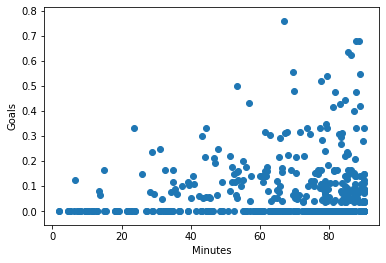

In [14]:
# Plot: average goals per minute 
plt.scatter(player_df_list_group.Min, player_df_list_group.Gls)
plt.xlabel('Minutes')
plt.ylabel('Goals')
plt.show()

In [17]:
X = player_df_list_group.Min.values.reshape(-1, 1)

In [19]:
#X[:5]
X.shape

(484, 1)

In [20]:
y = player_df_list_group.Gls

In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# Plot: Model results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)